In [1]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#data wrangling
import pandas as pd
import numpy as np

#datetime
import datetime as dt

#visualize
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle


In [2]:
# load sheet Transactions trong file KPMG và in ra 5 dòng đầu tiên
transactions = pd.read_excel('KPMG.xlsx', sheet_name="Transactions")
print(transactions.head(5))

   transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost  product_first_sold_date  
0       71.49          53.62        

In [3]:
# in ra info bảng
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [4]:
# describe default
transactions.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [5]:
# describe các biến object
transactions.describe(include=[np.object])

,order_status,brand,product_line,product_class,product_size
count,20000,19803,19803,19803,19803
unique,2,6,4,3,3
top,Approved,Solex,Standard,medium,medium
freq,19821,4253,14176,13826,12990


In [6]:
#describe all
transactions.describe(include="all")

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000,19640.000000,20000,19803,19803,19803,19803,20000.000000,19803.000000,19803.000000
unique,NaN,NaN,NaN,364,NaN,2,6,4,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,2017-02-14 00:00:00,NaN,Approved,Solex,Standard,medium,medium,NaN,NaN,NaN
freq,NaN,NaN,NaN,82,NaN,19821,4253,14176,13826,12990,NaN,NaN,NaN
first,NaN,NaN,NaN,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2017-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10000.500000,45.36465,1738.246050,NaN,0.500458,NaN,NaN,NaN,NaN,NaN,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,NaN,0.500013,NaN,NaN,NaN,NaN,NaN,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,575.270000,215.140000,35667.000000


In [7]:
# count số dòng bị null ở mỗi cột
transactions.isnull().sum(axis=0)

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

# 1. Data Correction

## 1.1 Drop NA

In [8]:
# tạo bảng df_dropna_all bằng cách loại bỏ tất cả giá trị null trong bảng và in ra info
df_dropna_all = transactions.dropna(how='any')
df_dropna_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [9]:
# tạo bảng df_dropna_online_order bằng cách loại bỏ giá trị null trong cột online_order và in ra info
df_dropna_online_order = transactions.dropna(subset=['online_order'])
df_dropna_online_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19640 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19640 non-null  int64         
 1   product_id               19640 non-null  int64         
 2   customer_id              19640 non-null  int64         
 3   transaction_date         19640 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             19640 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19640 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

## 1.2 Fill NA

In [10]:
# fill tất cả NA bằng 0, lưu vào bảng df_fillna_0 và in ra info
df_fillna_0 = transactions.fillna(0)
df_fillna_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

In [11]:
# fill NA bằng ffill, lưu vào bảng df_fillna_ffill và in ra info
df_fillna_ffill = transactions.fillna("ffill")
df_fillna_ffill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  object        
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  object        
 12  product_first_sold_date  20000 n

In [12]:
# fill NA bằng bfill, lưu vào bảng df_fillna_bfill và in ra info
df_fillna_bfill = transactions.fillna("bfill")
df_fillna_bfill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  object        
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  object        
 12  product_first_sold_date  20000 n

## 1.3. Assess Categorial Data

In [13]:
# load sheet Demographic và hiển thị top head
demographic = pd.read_excel('KPMG.xlsx', sheet_name="CustomerDemographic")
print(demographic.head())

   customer_id      first_name  last_name  gender  \
0            1         Laraine  Medendorp       F   
1            2             Eli    Bockman    Male   
2            3           Arlin     Dearle    Male   
3            4          Talbot        NaN    Male   
4            5  Sheila-kathryn     Calton  Female   

   past_3_years_bike_related_purchases        DOB               job_title  \
0                                   93 1953-10-12     Executive Secretary   
1                                   81 1980-12-16  Administrative Officer   
2                                   61 1954-01-20      Recruiting Manager   
3                                   33 1961-10-03                     NaN   
4                                   56 1977-05-13           Senior Editor   

  job_industry_category     wealth_segment deceased_indicator  \
0                Health      Mass Customer                  N   
1    Financial Services      Mass Customer                  N   
2              Property

In [14]:
# in ra info bảng 
demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [15]:
# describe các giá trị object
demographic.describe(include=[np.object])

,first_name,last_name,gender,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car
count,4000,3875,4000,3494,3344,4000,4000,3698,4000
unique,3139,3725,6,195,9,3,2,90,2
top,Max,Pristnor,Female,Business Systems Development Analyst,Manufacturing,Mass Customer,N,100,Yes
freq,5,3,2037,45,799,2000,3998,113,2024


In [16]:
# Remove all NA row
df_dropna_all = demographic.dropna(how='any', axis = 0)
df_dropna_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2630 entries, 0 to 3996
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          2630 non-null   int64         
 1   first_name                           2630 non-null   object        
 2   last_name                            2630 non-null   object        
 3   gender                               2630 non-null   object        
 4   past_3_years_bike_related_purchases  2630 non-null   int64         
 5   DOB                                  2630 non-null   datetime64[ns]
 6   job_title                            2630 non-null   object        
 7   job_industry_category                2630 non-null   object        
 8   wealth_segment                       2630 non-null   object        
 9   deceased_indicator                   2630 non-null   object        
 10  default     

In [17]:
# In ra các giá trị unique của cột gender
print(demographic["gender"].unique())

['F' 'Male' 'Female' 'U' 'Femal' 'M']


In [18]:
# Quy chuẩn cột Gender về 2 nhóm Male và Female, Unisex và in ra giá trị unique mới
demographic["gender"] = demographic["gender"].replace(dict.fromkeys(["F", "Femal"],"Female"))
demographic = demographic.replace({"gender":{"M": "Male", "U": "Unisex"}})   
print(demographic["gender"].unique())

['Female' 'Male' 'Unisex']


In [19]:
# Tính tuổi của mỗi khách hàng và lưu vào cột "Age" và in ra min age, max age
demographic["age"] = demographic["DOB"].apply(lambda x : (dt.datetime.now().year - x.year))
print(demographic["age"].min())
print(demographic["age"].max())

20.0
179.0


In [20]:
demographic = demographic[demographic.age != 179]
print(demographic["age"].max())

91.0


In [21]:
# phân nhóm khách hàng dưới 35 tuổi là nhóm "Young", Từ 36 - 55 là "Middle", trên 55 là Older
# lưu vào cột "Age_Group" bằng cách sử dụng hàm cut
bins = [0, 35, 55, 179]
labels = ["young","middle","older"]
demographic["age_group"] = pd.cut(demographic["age"], bins=bins, labels=labels)

# 2. Data Completeness

In [22]:
#join data sale vs demographic và in ra những trường hợp missing trong demographic
data = transactions.merge(demographic, how="outer", on="customer_id")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20507 entries, 0 to 20506
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       20000 non-null  float64       
 1   product_id                           20000 non-null  float64       
 2   customer_id                          20507 non-null  int64         
 3   transaction_date                     20000 non-null  datetime64[ns]
 4   online_order                         19640 non-null  float64       
 5   order_status                         20000 non-null  object        
 6   brand                                19803 non-null  object        
 7   product_line                         19803 non-null  object        
 8   product_class                        19803 non-null  object        
 9   product_size                         19803 non-null  object        
 10  list_price

In [23]:
demographic[demographic.isna().any(axis=1)]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age,age_group
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,61.0,older
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,45.0,middle
5,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13.0,56.0,older
6,7,Fina,Merali,Female,6,1976-02-23,NaN,Financial Services,Affluent Customer,N,â°â´âµâââ,Yes,11.0,46.0,middle
7,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,NaN,Mass Customer,N,(â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»),No,7.0,60.0,older
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3985,3986,Oralle,Petrello,Female,1,1976-12-01,Social Worker,Health,Mass Customer,N,NaN,No,21.0,46.0,middle
3986,3987,Beckie,Wakeham,Female,18,1964-05-29,NaN,Argiculture,Mass Customer,N,á,No,7.0,58.0,older
3997,3998,Sarene,Woolley,Unisex,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN,NaN,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0,49.0,middle


# 3. Data Aggregation

In [24]:
# tính tổng khách hàng bằng hàm nunique
demographic["customer_id"].nunique()

3999

In [25]:
# Tính số khách khách hàng mỗi tháng
# hint 1: tạo collum year_month bằng hàm dt.strftime
data_dropna_all = data.dropna(how='all')
data_dropna_all["transaction_date"] = pd.to_datetime(data_dropna_all.transaction_date, format='%Y-%m-%d')
data_dropna_all["year_month_transaction"] = data_dropna_all["transaction_date"].dt.strftime('%Y-%m')

In [26]:
# hint 2: group by year_month và nunique
data_dropna_all.groupby("year_month_transaction")["customer_id"].nunique()

year_month_transaction
2017-01    1354
2017-02    1286
2017-03    1317
2017-04    1310
2017-05    1310
2017-06    1266
2017-07    1354
2017-08    1372
2017-09    1263
2017-10    1414
2017-11    1319
2017-12    1322
Name: customer_id, dtype: int64

In [27]:
# Tính Gross magin của mỗi tháng. Gross magin = list_price - standard_cost
# hint 1: tạo collum Gross_Margin
data_dropna_all["gross_margin"] = data_dropna_all["list_price"] - data_dropna_all["standard_cost"]
pd.options.display.float_format = '{:.2f}'.format

In [28]:
# hint 2: group by year_month và sử dụng hàm agg
data_dropna_all.groupby("year_month_transaction").agg({"gross_margin": "sum"}).reset_index()

,year_month_transaction,gross_margin
0,2017-01,929487.74
1,2017-02,870819.06
2,2017-03,879243.40
3,2017-04,904691.31
4,2017-05,913742.61
5,2017-06,859571.55
6,2017-07,938619.29
7,2017-08,970452.52
8,2017-09,862290.49
9,2017-10,984973.46


In [29]:
# Tính số lượng order và doanh thu group by online_order và order_status 
# hint 1: group by online_order, order_status và sử dụng hàm agg
data_dropna_all.groupby(["online_order", "order_status"]).agg({"transaction_id": "nunique","list_price":"sum"}).rename(columns={"list_price":"revenue"}).reset_index()

,online_order,order_status,transaction_id,revenue
0,0.00,Approved,9735,10776568.41
1,0.00,Cancelled,76,87043.72
2,1.00,Approved,9732,10771244.16
3,1.00,Cancelled,97,108924.20


# 4. Data Visualization

In [30]:
# Sử dụng seaborn và vẽ ra 5 loại chart khác nhau (column, line, box,...) với đầy đủ tên chart, tên các trục và chú thích.

In [31]:
df1 = data_dropna_all.loc[(data_dropna_all["order_status"] == "Approved")]
df1["transaction time"] = df1["transaction_date"].dt.strftime("%m")
df2 = df1.groupby(["transaction time"]).agg({"gross_margin": "sum", "list_price":"sum"}).rename(columns={"list_price":"revenue"}).reset_index()
df2

,transaction time,gross_margin,revenue
0,01,918820.39,1846812.04
1,02,869942.57,1793659.92
2,03,874394.81,1804421.68
3,04,895174.46,1821162.56
4,05,904889.65,1891692.07
5,06,849411.96,1736333.54
6,07,932158.15,1879357.66
7,08,963138.15,1918418.19
8,09,854069.19,1728605.72
9,10,975157.47,1943183.27


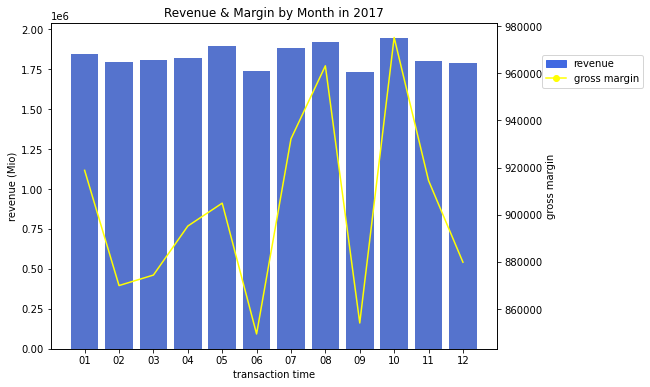

In [32]:
fig, ax1 = plt.subplots(figsize = (8,6))
ax2 = ax1.twinx() # secondary y-axis

a = sns.barplot(x="transaction time", y="revenue", color="royalblue", data=df2, ax=ax1) # on primary ax1
b = sns.lineplot(x="transaction time", y="gross_margin", color = "yellow", data=df2.reset_index(), ax=ax2)


a.set_xticklabels(a.get_xticklabels())
a.set_xlabel("transaction time")
a.set_ylabel("revenue (Mio)")
b.set_ylabel("gross margin")
a.legend(handles=[Rectangle((0,0), 0, 0, color="royalblue", label="revenue"), Line2D([], [], marker="o", color="yellow", label="gross margin")], loc=(1.1,0.8))
plt.title("Revenue & Margin by Month in 2017")

plt.show()

Nhận xét: năm 2017, từ tháng 01 đến tháng 12, doanh dao động không theo xu hướng tăng giảm rõ rệt, nhưng phần margin lại biến động mạnh và có xu hướng giảm ở cuối năm

In [33]:
df3 = df1.groupby(["brand"]).agg({"transaction_id": "nunique", "gross_margin": "sum"}).rename(columns={"transaction_id":"count"})
df3 = df3.sort_values(by="count", ascending=False).reset_index()
df3

,brand,count,gross_margin
0,Solex,4211,2388554.84
1,Giant Bicycles,3283,1560130.48
2,WeareA2B,3265,2729902.83
3,OHM Cycles,3016,1471181.17
4,Trek Bicycles,2965,1822846.19
5,Norco Bicycles,2885,858888.52


<Figure size 576x432 with 0 Axes>

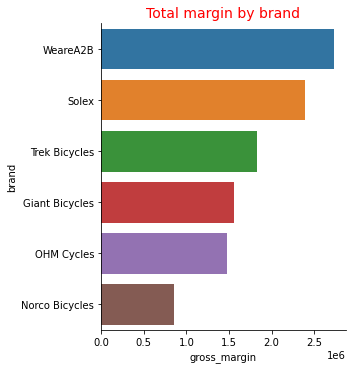

In [34]:
plt.figure(figsize=(8,6))
c=sns.catplot(data=df3, x="gross_margin",y ="brand", kind="bar", order=df3.sort_values("gross_margin",ascending=False).brand)
plt.title("Total margin by brand",fontsize=14, color='red')
plt.show()

Nhận xét: Dù Solex là brand có tổng giao dịch trong năm 2017 cao nhất nhưng đây không phải là brand có gross margin cao nhất, mà thay vào đó là WeareA2B với tổng số viao dịch đứng ở vị trí thứ 3.

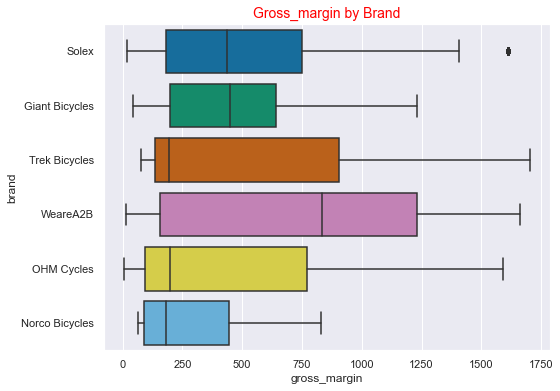

In [35]:
d = sns.set(rc={"figure.figsize":(8,6)})
d = sns.boxplot(x="gross_margin", y="brand", data=df1, palette="colorblind6")
d.set_title("Gross_margin by Brand", fontsize=14, color='red')
plt.show()

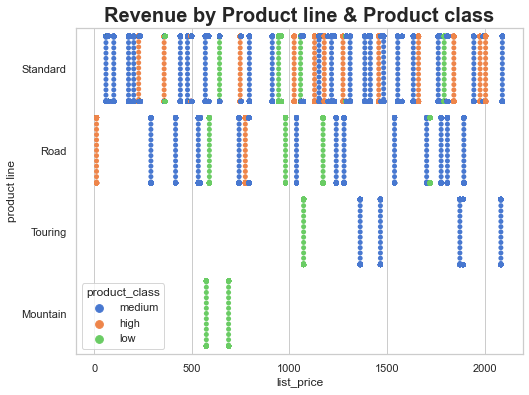

In [36]:
plt.figure(figsize=(8,6))
sns.set_theme(style="whitegrid", palette="muted")
e = sns.swarmplot(data=data_dropna_all, x="list_price", y="product_line", hue="product_class")
e.set(ylabel="product line")
plt.title("Revenue by Product line & Product class", fontdict= {'fontsize': 20, 'fontweight':'bold'})
plt.show()

In [37]:
df4 = df1
df4 = df1.groupby(["brand","transaction time"]).agg({"transaction_id": "nunique"}).rename(columns={"transaction_id":"count"}).reset_index()
df4

#df1 = data_dropna_all.loc[(data_dropna_all["order_status"] == "Approved")]
#df1["transaction time"] = df1["transaction_date"].dt.strftime("%m")
#df2 = df1.groupby(["transaction time"]).agg({"gross_margin": "sum", "list_price":"sum"}).rename(columns={"list_price":"revenue"}).reset_index()

,brand,transaction time,count
0,Giant Bicycles,01,278
1,Giant Bicycles,02,267
2,Giant Bicycles,03,237
3,Giant Bicycles,04,261
4,Giant Bicycles,05,298
...,...,...,...
67,WeareA2B,08,288
68,WeareA2B,09,271
69,WeareA2B,10,298
70,WeareA2B,11,268


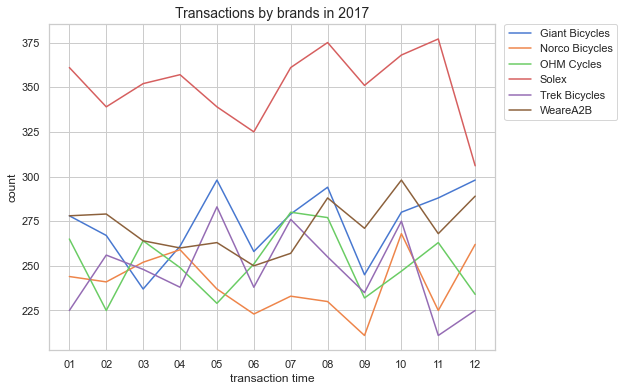

In [38]:
plt.figure(figsize=(8,6))
sns.lineplot(x="transaction time", y="count",
             hue="brand",
             data=df4)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Transactions by brands in 2017",fontsize=14)
plt.show()